#  EEG ANALYSIS - event related potentials (ERPs)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne

root = mne.datasets.sample.data_path() / 'MEG' / 'sample'
raw_file = root / 'sample_audvis_filt-0-40_raw.fif'
raw = mne.io.read_raw_fif(raw_file, preload=False)

events_file = root / 'sample_audvis_filt-0-40_raw-eve.fif'
events = mne.read_events(events_file)

raw.crop(tmax=90)  # in seconds (happens in-place)
# discard events >90 seconds (not strictly necessary, but avoids some warnings)
events = events[events[:, 0] <= raw.last_samp]

Opening raw data file /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [2]:
raw.pick(['eeg', 'eog']).load_data()
raw.info

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Reading 0 ... 13514  =      0.000 ...    90.001 secs...


<Info | 15 non-empty values
 bads: 1 items (EEG 053)
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 61
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>

In [3]:
channel_renaming_dict = {name: name.replace(' 0', '').lower()
                         for name in raw.ch_names}
_ = raw.rename_channels(channel_renaming_dict)  # happens in-place

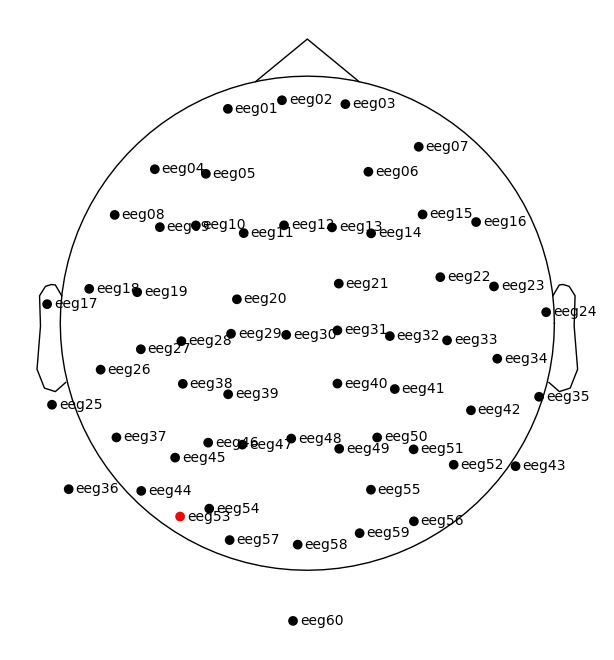

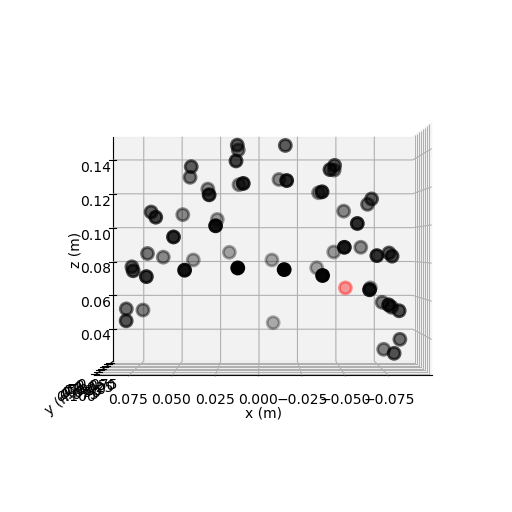

In [4]:
raw.plot_sensors(show_names=True)
fig = raw.plot_sensors('3d')

Using matplotlib as 2D backend.


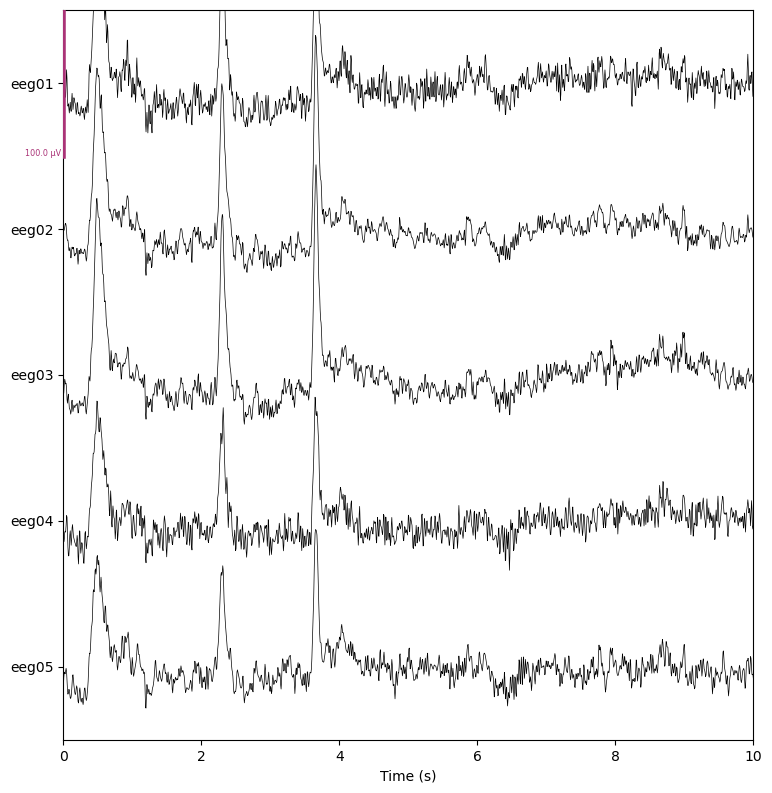

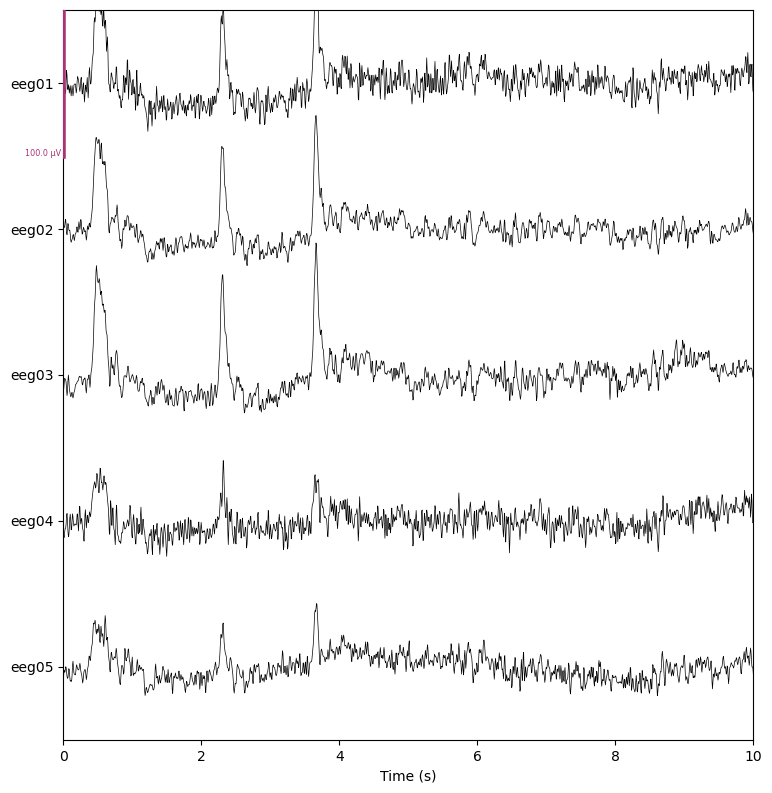

In [5]:
for proj in (False, True):
    with mne.viz.use_browser_backend('matplotlib'):
        fig = raw.plot(n_channels=5, proj=proj, scalings=dict(eeg=50e-6),
                       show_scrollbars=False)
    fig.subplots_adjust(top=0.9)  # make room for title
    ref = 'Average' if proj else 'No'
    fig.suptitle(f'{ref} reference', size='xx-large', weight='bold')

filtering

In [6]:
raw.filter(l_freq=0.1, h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 4957 samples (33.013 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished


<Raw | sample_audvis_filt-0-40_raw.fif, 61 x 13515 (90.0 s), ~9.2 MB, data loaded>

### Evoked responses: epoching and averaging

In [7]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'face': 5, 'buttonpress': 32}

Not setting metadata
132 matching events found
Setting baseline interval to [-0.2996928197375818, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 132 events and 151 original time points ...
1 bad epochs dropped
You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


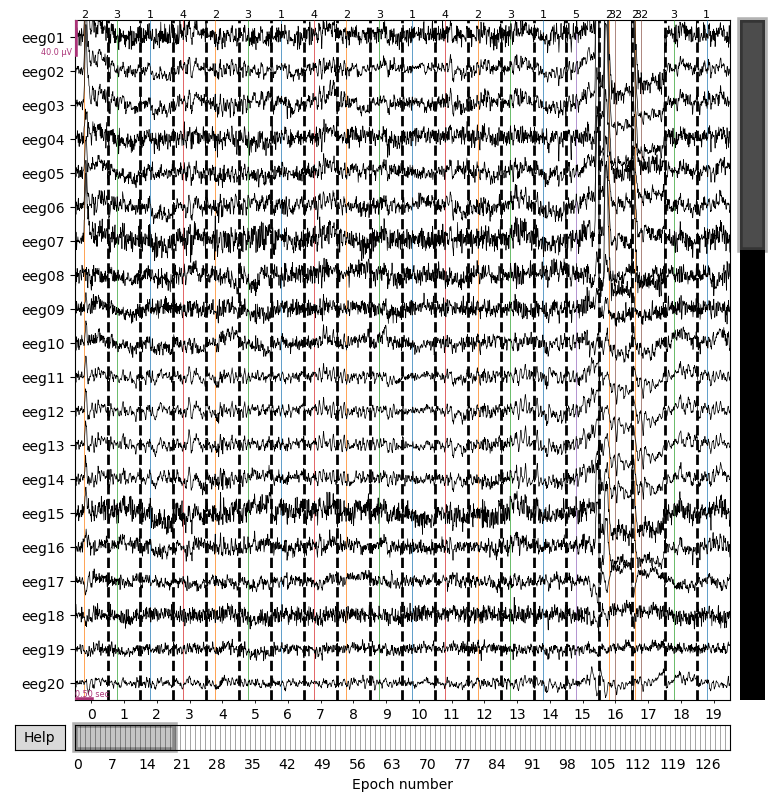

In [8]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.3, tmax=0.7,
                    preload=True)
fig = epochs.plot(events=events)

In [9]:
reject_criteria = dict(eeg=100e-6, eog=200e-6)  # 100 µV, 200 µV
epochs.drop_bad(reject=reject_criteria)

    Rejecting  epoch based on EEG : ['eeg03']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg04', 'eeg06', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01', 'eeg02', 'eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg01']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg03', 'eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg07']
    Rejecting  epoch based on EEG : ['eeg03']
    Rejecting  epoch based on EEG : ['eeg25']
    Rejecting  epoch based on EEG : ['e

<Epochs |  114 events (all good), -0.299693 - 0.699283 sec, baseline -0.299693 – 0 sec, ~10.9 MB, data loaded,
 'auditory/left': 25
 'auditory/right': 27
 'visual/left': 28
 'visual/right': 25
 'face': 5
 'buttonpress': 4>

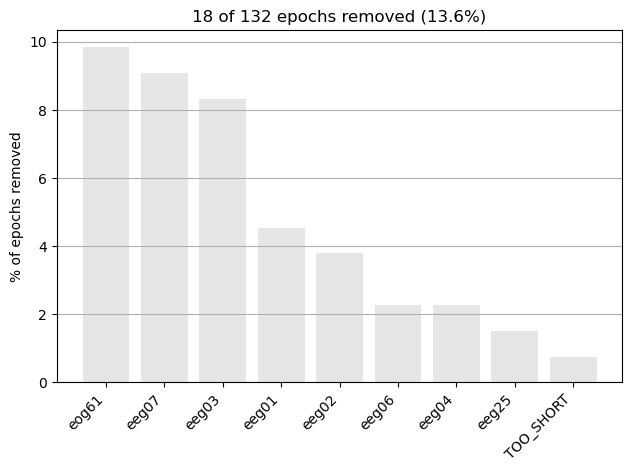

In [11]:
epochs.plot_drop_log();

In [12]:
l_aud = epochs['auditory/left'].average()
l_vis = epochs['visual/left'].average()

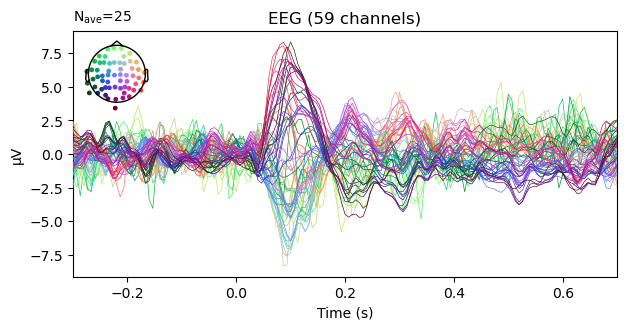

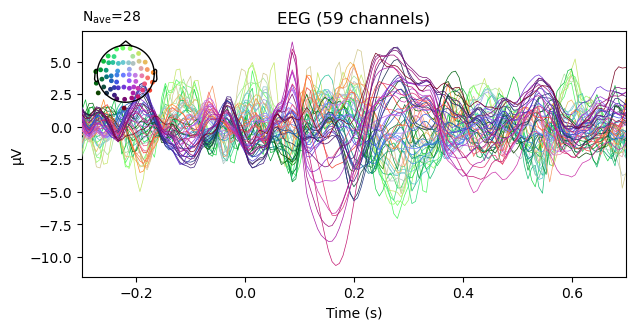

In [13]:
fig1 = l_aud.plot()
fig2 = l_vis.plot(spatial_colors=True)

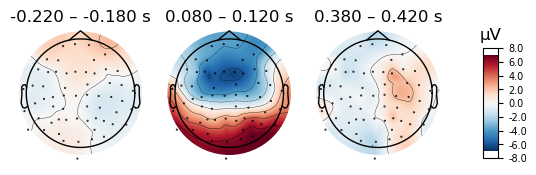

In [14]:
l_aud.plot_topomap(times=[-0.2, 0.1, 0.4], average=0.05);

Projections have already been applied. Setting proj attribute to True.


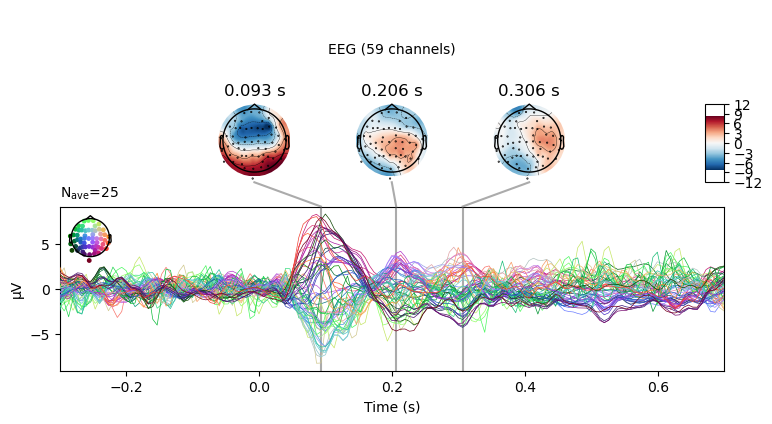

In [15]:
l_aud.plot_joint();

#### GLOBAL FIELD POWER(GFP)

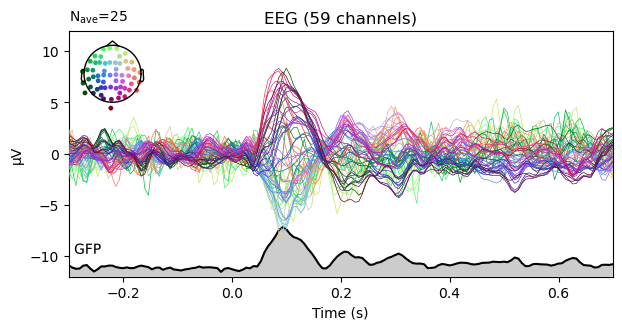

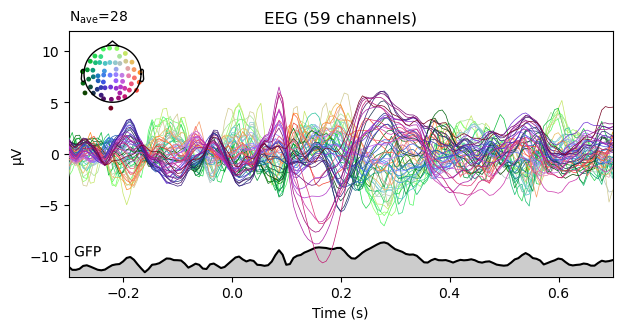

In [16]:
for evk in (l_aud, l_vis):
    evk.plot(gfp=True, spatial_colors=True, ylim=dict(eeg=[-12, 12]))

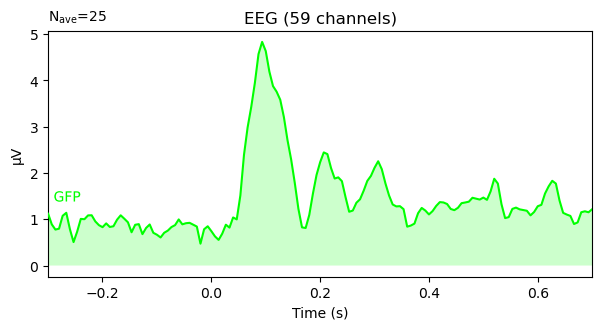

In [18]:
l_aud.plot(gfp='only');

averaging across channels with regions of interest

In [19]:
left = ['eeg17', 'eeg18', 'eeg25', 'eeg26']
right = ['eeg23', 'eeg24', 'eeg34', 'eeg35']

left_ix = mne.pick_channels(l_aud.info['ch_names'], include=left)
right_ix = mne.pick_channels(l_aud.info['ch_names'], include=right)

Applying baseline correction (mode: mean)
['left_ROI', 'right_ROI']


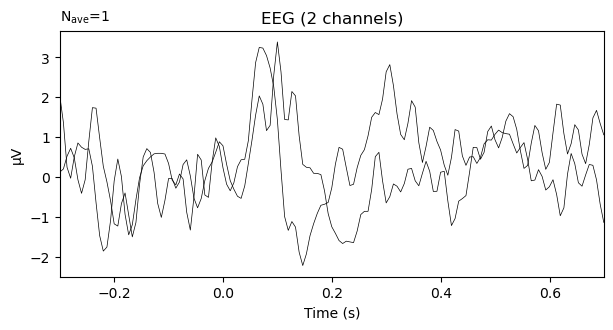

In [21]:
roi_dict = dict(left_ROI=left_ix, right_ROI=right_ix)
roi_evoked = mne.channels.combine_channels(l_aud, roi_dict, method='mean')
print(roi_evoked.info['ch_names'])
roi_evoked.plot();

combining channels using "mean"
combining channels using "mean"


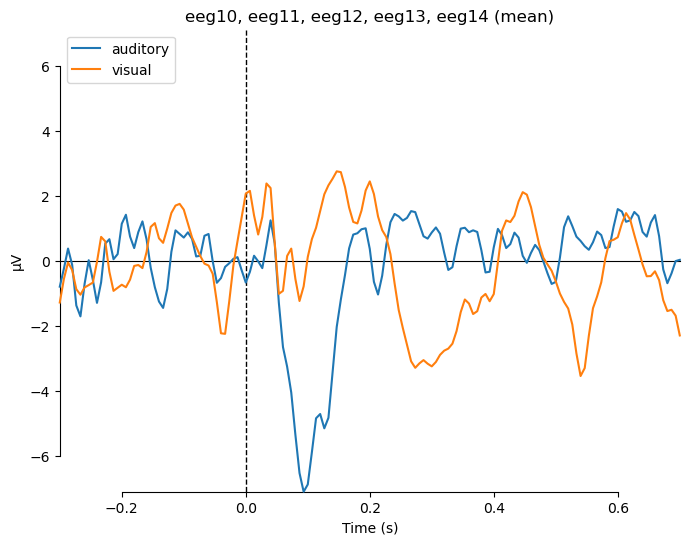

[<Figure size 800x600 with 1 Axes>]

In [22]:
evokeds = dict(auditory=l_aud, visual=l_vis)
picks = [f'eeg{n}' for n in range(10, 15)]
mne.viz.plot_compare_evokeds(evokeds, picks=picks, combine='mean')

combining channels using "mean"
combining channels using "mean"


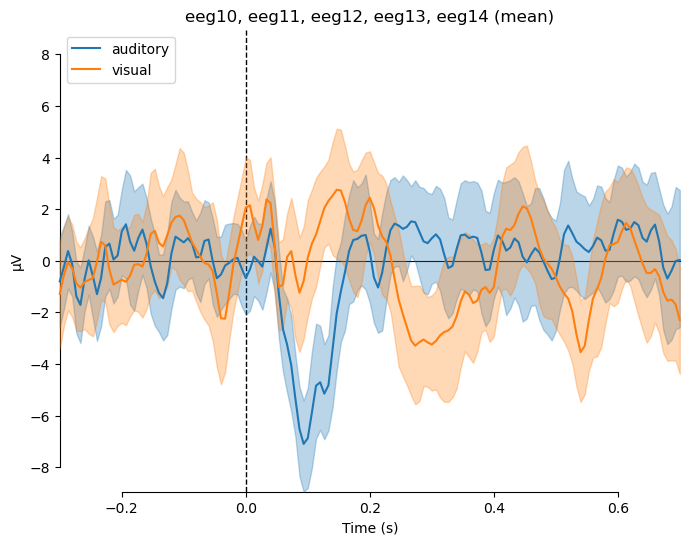

[<Figure size 800x600 with 1 Axes>]

In [23]:
evokeds = dict(auditory=list(epochs['auditory/left'].iter_evoked()),
               visual=list(epochs['visual/left'].iter_evoked()))
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=picks)

Projections have already been applied. Setting proj attribute to True.


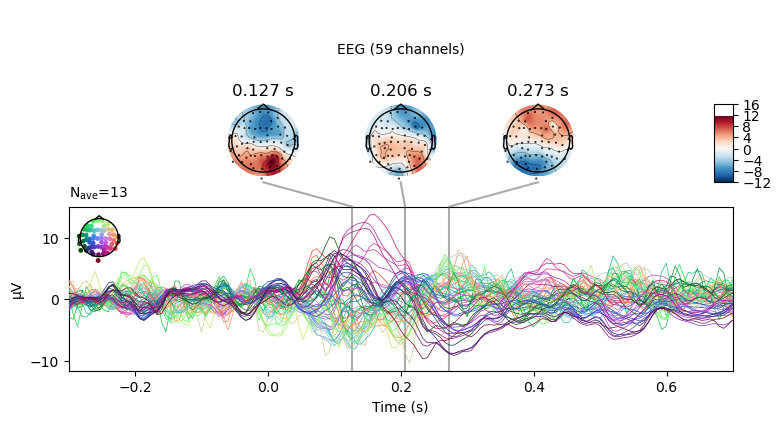

In [24]:
aud_minus_vis = mne.combine_evoked([l_aud, l_vis], weights=[1, -1])
aud_minus_vis.plot_joint();

Grand averages

In [25]:
grand_average = mne.grand_average([l_aud, l_vis])
print(grand_average)

Interpolating bad channels
    Automatic origin fit: head of radius 91.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Interpolating bad channels
    Automatic origin fit: head of radius 91.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 1 sensors
Identifying common channels ...
<Evoked | 'Grand average (n = 2)' (average, N=2), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 60 ch, ~3.0 MB>


In [26]:
epochs['auditory'].average()

<Evoked | '0.48 × auditory/left + 0.52 × auditory/right' (average, N=52), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 60 ch, ~3.0 MB>

# plot whitened data

In [27]:
import mne
from mne.datasets import sample

Opening raw data file /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
319 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated


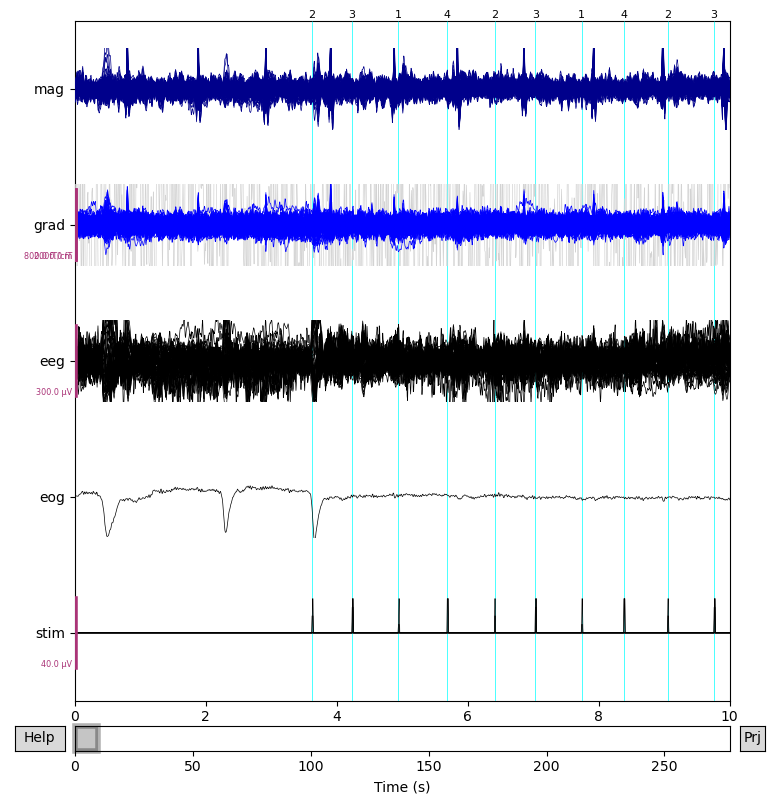

Computing rank from covariance with rank=None
    Using tolerance 8.3e-14 (2.2e-16 eps * 59 dim * 6.3  max singular value)
    Estimated rank (eeg): 58
    EEG: rank 58 computed from 59 data channels with 1 projector
Computing rank from covariance with rank=None
    Using tolerance 1.9e-13 (2.2e-16 eps * 203 dim * 4.3  max singular value)
    Estimated rank (grad): 203
    GRAD: rank 203 computed from 203 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 2.7e-14 (2.2e-16 eps * 102 dim * 1.2  max singular value)
    Estimated rank (mag): 99
    MAG: rank 99 computed from 102 data channels with 3 projectors


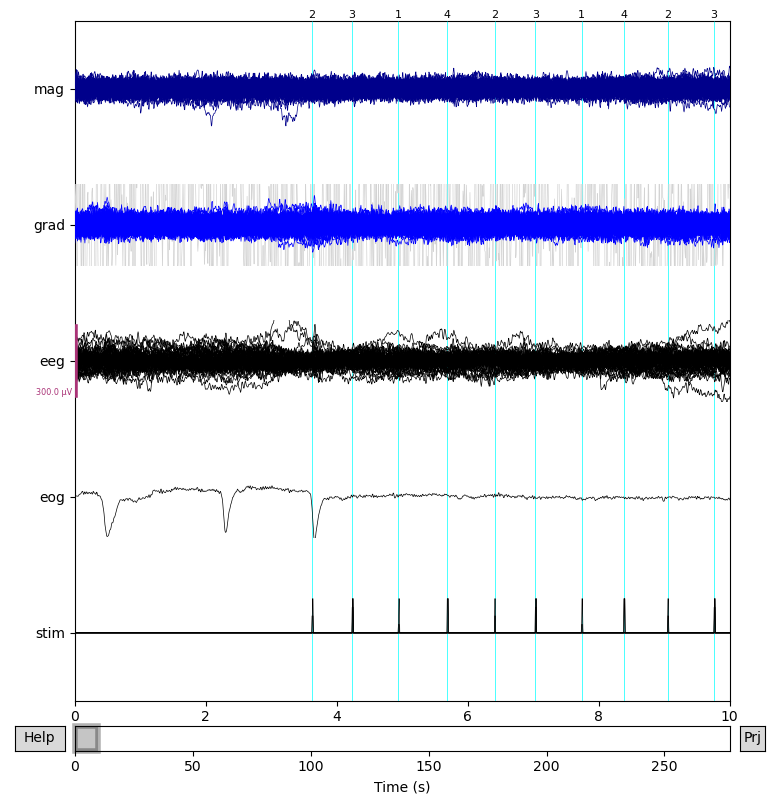

In [28]:
data_path = sample.data_path()
raw_fname = data_path / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif'
raw = mne.io.read_raw_fif(raw_fname, preload=True)

events = mne.find_events(raw, stim_channel='STI 014')
event_id = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
            'visual/right': 4, 'smiley': 5, 'button': 32}
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)
epochs = mne.Epochs(raw, events, event_id=event_id, reject=reject)

# baseline noise cov, not a lot of samples
noise_cov = mne.compute_covariance(epochs, tmax=0., method='shrunk', rank=None,
                                   verbose='error')

# butterfly mode shows the differences most clearly
raw.plot(events=events, butterfly=True);
raw.plot(noise_cov=noise_cov, events=events, butterfly=True);

Using data from preloaded Raw for 20 events and 106 original time points ...


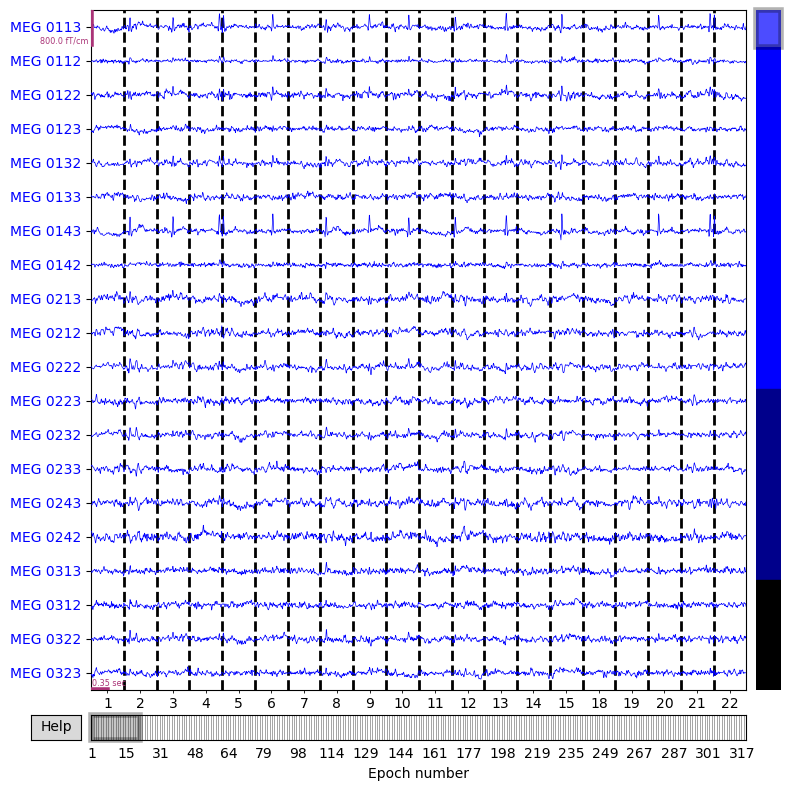

Computing rank from covariance with rank=None
    Using tolerance 8.3e-14 (2.2e-16 eps * 59 dim * 6.3  max singular value)
    Estimated rank (eeg): 58
    EEG: rank 58 computed from 59 data channels with 1 projector
Computing rank from covariance with rank=None
    Using tolerance 1.9e-13 (2.2e-16 eps * 203 dim * 4.3  max singular value)
    Estimated rank (grad): 203
    GRAD: rank 203 computed from 203 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 2.7e-14 (2.2e-16 eps * 102 dim * 1.2  max singular value)
    Estimated rank (mag): 99
    MAG: rank 99 computed from 102 data channels with 3 projectors
Using data from preloaded Raw for 20 events and 106 original time points ...


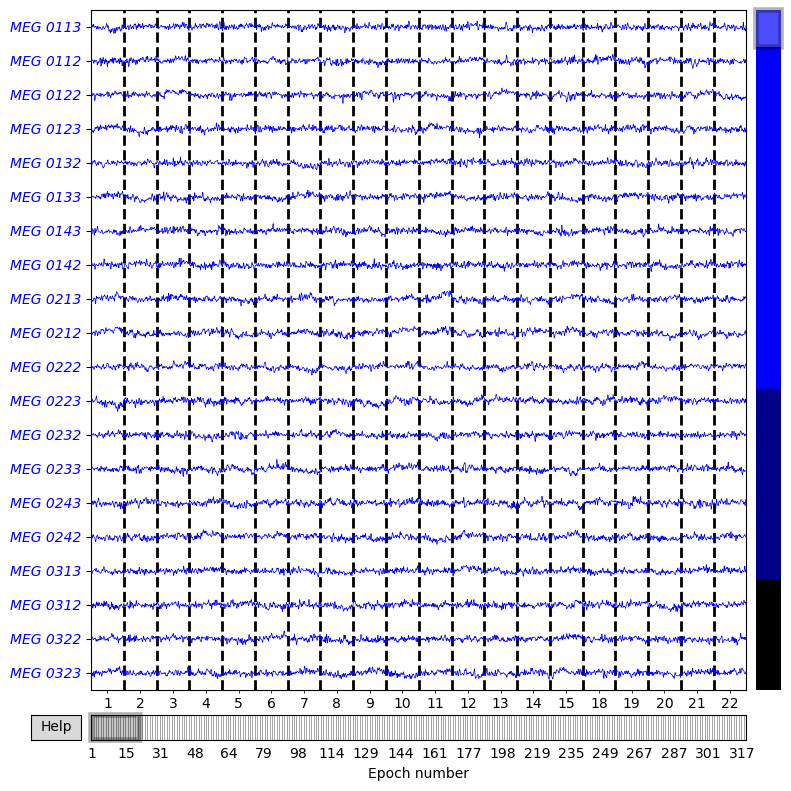

In [30]:
epochs.plot();
epochs.plot(noise_cov=noise_cov);

Evoked data with whitening

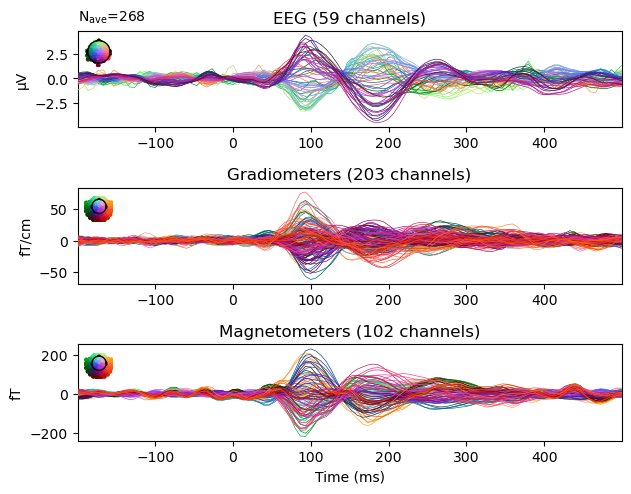

Computing rank from covariance with rank=None
    Using tolerance 8.3e-14 (2.2e-16 eps * 59 dim * 6.3  max singular value)
    Estimated rank (eeg): 58
    EEG: rank 58 computed from 59 data channels with 1 projector
Computing rank from covariance with rank=None
    Using tolerance 1.9e-13 (2.2e-16 eps * 203 dim * 4.3  max singular value)
    Estimated rank (grad): 203
    GRAD: rank 203 computed from 203 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 2.7e-14 (2.2e-16 eps * 102 dim * 1.2  max singular value)
    Estimated rank (mag): 99
    MAG: rank 99 computed from 102 data channels with 3 projectors


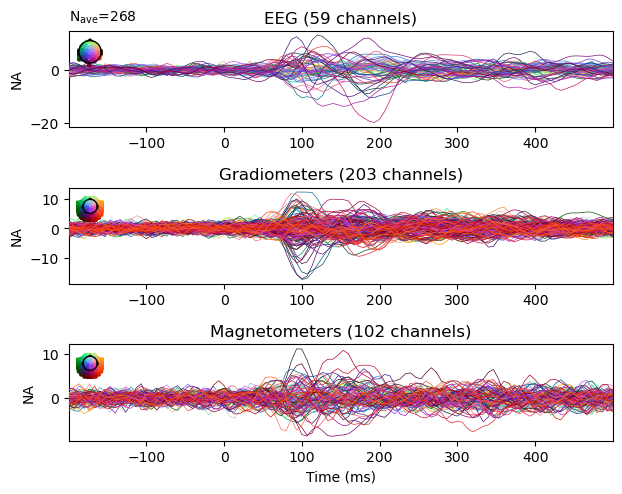

In [34]:
evoked = epochs.average()
evoked.plot(time_unit='ms');
evoked.plot(noise_cov=noise_cov, time_unit='ms');

Computing rank from covariance with rank=None
    Using tolerance 8.3e-14 (2.2e-16 eps * 59 dim * 6.3  max singular value)
    Estimated rank (eeg): 58
    EEG: rank 58 computed from 59 data channels with 1 projector
Computing rank from covariance with rank=None
    Using tolerance 1.9e-13 (2.2e-16 eps * 203 dim * 4.3  max singular value)
    Estimated rank (grad): 203
    GRAD: rank 203 computed from 203 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 2.7e-14 (2.2e-16 eps * 102 dim * 1.2  max singular value)
    Estimated rank (mag): 99
    MAG: rank 99 computed from 102 data channels with 3 projectors
    Created an SSP operator (subspace dimension = 4)
Computing rank from covariance with rank={'eeg': 58, 'grad': 203, 'mag': 99, 'meg': 302}
    Setting small MEG eigenvalues to zero (without PCA)
    Setting small EEG eigenvalues to zero (without PCA)
    Created the whitener using a noise covariance matrix with rank 360 (4 small eigen

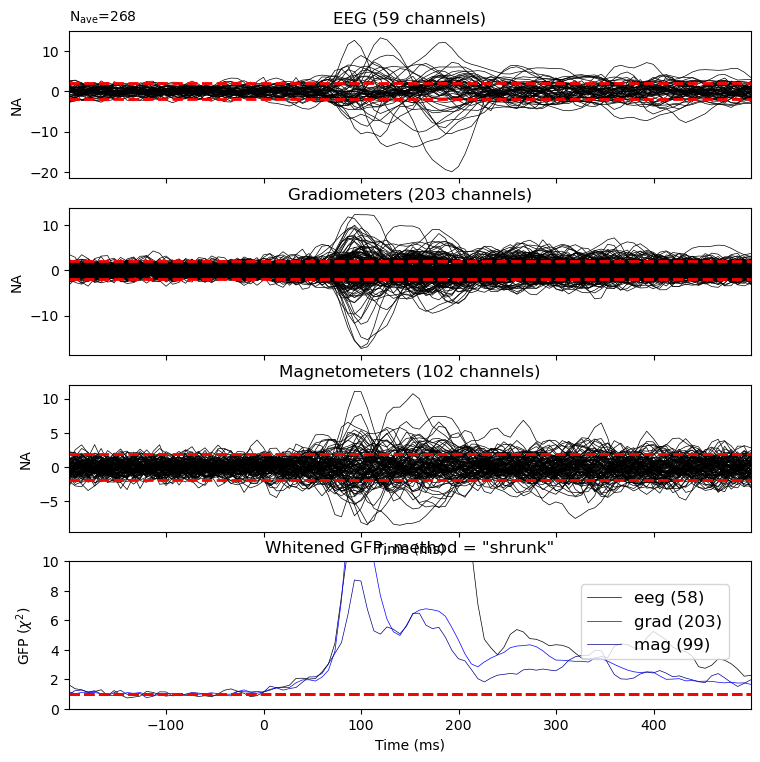

In [35]:
evoked.plot_white(noise_cov=noise_cov, time_unit='ms');